## Font rendering in Matplotlib

#today: 2022-09-05 </br>
#version: 1.0 </br>
#tags: matplotlib, fonts, rendering </br>

In [1]:
# Premble
import pandas as pd
import numpy as np

import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

import matplotlib as mpl

In [2]:
# import data from .dat file
def import_data(file_name):
    data = pd.read_csv(file_name, sep='\t', header=None)
    return data

In [3]:
# Function to plot data and save as pdf
def plot_data(df, file_name):
  # plot data
  fig, ax = plt.subplots()
  # figure size in inches
  fig.set_size_inches(5, 5)
  ax.plot(df[0], df[1], label='$\Delta E_s$')
  ax.plot(df[0], df[2], label='$\Delta E_s + E_k$')

  # show legend
  ax.legend()

  # axis equal 
  ax.set_aspect('equal')
  # limit x and y axes 0 to 1
  ax.set_xlim(0, 1)
  ax.set_ylim(0, 1)
  # set axis labels
  ax.set_xlabel('$t$')
  ax.set_ylabel('$E_i/E_0$')
  plt.savefig(file_name, bbox_inches='tight')

## Method 1: 

* Use the `matplotlib.font_manager` module to use a custom font -- here CMU Serif.
* mathtext.fontset is 'cm'
* pdf.fonttype is 42 to get TrueType fonts embedded in the PDF. This allows editing the text in Adobe Illustrator or other PDF editors.

In [4]:
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname='matplotlibFonts/cmunrm.ttf')
# print(cmfont.get_name())
# print(cmfont)

mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False

# FixMe: using 42 to render good font in pdf gives strange warning related to TeX not being the subset. Using tex as a renderer doesn't embed the right font. 
mpl.rcParams['pdf.fonttype'] = 42 # 42 is the answer to everything.

AxesLabel, TickLabel = [12, 12]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})


TeX  NOT subset; don't know how to subset; dropped
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


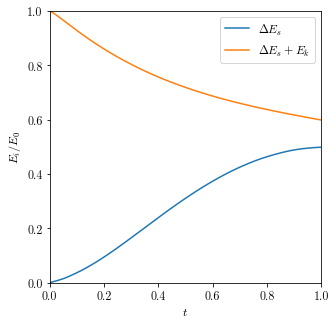

In [5]:
df = import_data('Test.dat')
# print(df.head())
# Plotting the data in the dataframe df and saving the plot as a pdf file called Test.pdf
plot_data(df, 'Test_CMUSerif42_v0.pdf')

The code above works nicely. The only issue is the annoying warning message that you see above: 
TeX  NOT subset; don't know how to subset; dropped
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp

If we get rid of these messages, we can use the above code. 

## Method 2:

One way many people use LaTeX rendering is by using text.useTex: True in the matplotlibrc file. This is a global setting, and it will affect all the plots you make.

In [6]:
mpl.rcParams['text.usetex'] = True # has issues editing with Illustrator. 
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname='matplotlibFonts/cmunrm.ttf')
# print(cmfont.get_name())
# print(cmfont)

mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False

# FixMe: using 42 to render good font in pdf gives strange warning related to TeX not being the subset. Using tex as a renderer doesn't embed the right font. 
mpl.rcParams['pdf.fonttype'] = 42 # 42 is the answer to everything.
mpl.rcParams['ps.fonttype'] = 42 

AxesLabel, TickLabel = [12, 12]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})

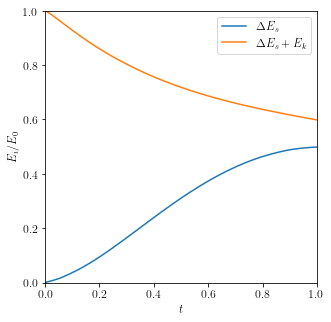

In [7]:
df = import_data('Test.dat')
# print(df.head())
# Plotting the data in the dataframe df and saving the plot as a pdf file called Test.pdf
plot_data(df, 'Test_useTeX_v0.pdf')

Works well. No error message. Unfortunately, this has two issues: 

* It embeds CMMI fonts in the PDF, which are not editable in Adobe Illustrator -- we can convert these into CMU Serif, but it is a pain as it needs to be done manually for each font.
* usetex does not group terms in math mode. For example, if you have a term like $a^2 + b^2 = c^2$, it will not group the terms in math mode. This is a problem if you want to change the font of the terms in math mode. Or, instead of 1.0 it renders as {1}{.}{0} which is again annoying. 

## Method 3:

* Same as Method 1 but kill pdf.fonttype 42. This will use Type 3 fonts, which are not editable in Adobe Illustrator.


In [10]:
mpl.rcParams['text.usetex'] = False # has issues editing with Illustrator. 
mpl.rcParams['font.family'] = 'serif'
cmfont = font_manager.FontProperties(fname='matplotlibFonts/cmunrm.ttf')
# print(cmfont.get_name())
# print(cmfont)

mpl.rcParams['font.serif'] = cmfont.get_name()
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['axes.unicode_minus'] = False

# FixMe: using 42 to render good font in pdf gives strange warning related to TeX not being the subset. Using tex as a renderer doesn't embed the right font. 
mpl.rcParams['pdf.fonttype'] = 3 # 42 is the answer to everything.

AxesLabel, TickLabel = [12, 12]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})


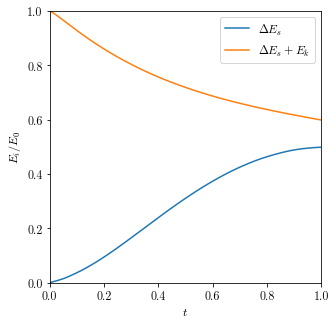

In [11]:
df = import_data('Test.dat')
# print(df.head())
# Plotting the data in the dataframe df and saving the plot as a pdf file called Test.pdf
plot_data(df, 'Test_CMUSerif_v0.pdf')

That worked without warning. It gives CMU Serif fonts as well. 

There is just one problem: the fonts are not editable in Adobe Illustrator. :(